## Data

In [1]:
from notebooks.text_processing import generate_corpus_df, add_sectarian_label, convert_df_to_by_book
import pandas as pd

from notebooks.utils import generate_composition_to_book


In [2]:
df = generate_corpus_df()
df = add_sectarian_label(df)

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


100%|██████████| 52895/52895 [00:04<00:00, 10633.10it/s]
[04-19 18:08:47] {/Users/yonatanlou/dev/QumranNLP/notebooks/text_processing.py:60} INFO - Generated 997 unique books
/Users/yonatanlou/dev/QumranNLP/notebooks/utils.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["book_pasuk"] = df_filtered["book"] + " " + df_filtered["pasuk"]
[04-19 18:08:47] {/Users/yonatanlou/dev/QumranNLP/notebooks/text_processing.py:62} INFO - Removed 387 books that are smaller than 100 words per book


In [3]:
null_lines = (df["text"].isna())
print(f"remove {(null_lines.sum())} null lines")
df = df[~null_lines]
df_by_book = convert_df_to_by_book(df)
composition_to_book = generate_composition_to_book()
df_by_book_by_comp =pd.merge(df_by_book, composition_to_book, on="book", how="inner")
df_by_book_by_comp

remove 16 null lines


,book,text,label,section,composition
0,11Q1,וסמכ ידו על ראש השעיר ושחט אתו ╱ במקומ אשר י...,bib,NaN,Lev
1,11Q12,הודענו בצאתנו לפני יהוה אלוהינו את כול החטאו...,nonbib,non_sectarian_texts,Book_of_Jubilees
2,11Q19,כי נורא הוא אשר אני עושה עמכה . הנני גורש מ...,nonbib,unknown,Temple Scroll
3,11Q2,ואתן אתם לאהרן הכהן ולבניו לחק עולם מאת בני ╱ ...,bib,NaN,Lev
4,11Q20,והקריבו על המזבח לכול יום ויום פר בן...,nonbib,unknown,Temple Scroll
...,...,...,...,...,...
355,Mur88,╱ . ואת הצפוני ארחיק מעליכם והדחתיו...,bib,NaN,Nah
356,Mur88,╱ . ואת הצפוני ארחיק מעליכם והדחתיו...,bib,NaN,Obad
357,Mur88,╱ . ואת הצפוני ארחיק מעליכם והדחתיו...,bib,NaN,Zech
358,Mur88,╱ . ואת הצפוני ארחיק מעליכם והדחתיו...,bib,NaN,Zeph


In [4]:
df_by_book_by_comp.loc[1,"text"]

' הודענו בצאתנו  לפני יהוה אלוהינו את כול החטאות אשר יעשו בשמים  ובארץ ובאור ובחושך ובכול . והיו אדם ואשתו מתאבלים  על הבל ארבע שבועות .    ובארבעה לשבוע החמישי  שמחו וידע אדם שנית את אשתו ותלד לו בן ויקרא את שמו שת  כיא אמר שת לנו יהוה זרע בארץ אחר תחת הבל כיא הרגו  קין . בשבוע הששי הוליד את אזורה בתו . ויקח קין את אחותו  און לו לאשה ותלד לו את חנוך בקץ היובל הרביעי .    ובשנת אחת לשבוע הריאשון ליובל החמישי נבנו הבתים בארץ .  ויבן קין עיר ויקרא את שמה כמו שם בנו חנוך .  ואדם  ידע את חוה אשתו ותלד עוד תשעה בנים ובשבוע החמישי .  לקח אנוש את אחותו נועם לו לאשה ותלד לו בן בשנה  השלישית לשבוע החמישי ויקרא שמו קינן . ובקץ היובל  השמיני לקח לו קינן אשה את אחותו מהללת לאשה . ותלד  לו בן ביובל התשיעי בשבוע הריאשון בשלושה לשבוע .  הרביעי ליובל הזה ותלד לו בן בשבוע החמישי בשנה  הרביעית ליובל ויקרא את שמו חנוך  זה ריאשון .  ויכתוב בספר אותות השמים כחוק חודשיהמה למען ידעו בני  אדם תקופות השנים כחוקות לכול חודשיהמה . ריאשון הואה  כתב תעודה ויעד בבני אדם בדורות הארץ שבועות היובלים .  ריאשון נקבר באד

## Clustering by book

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


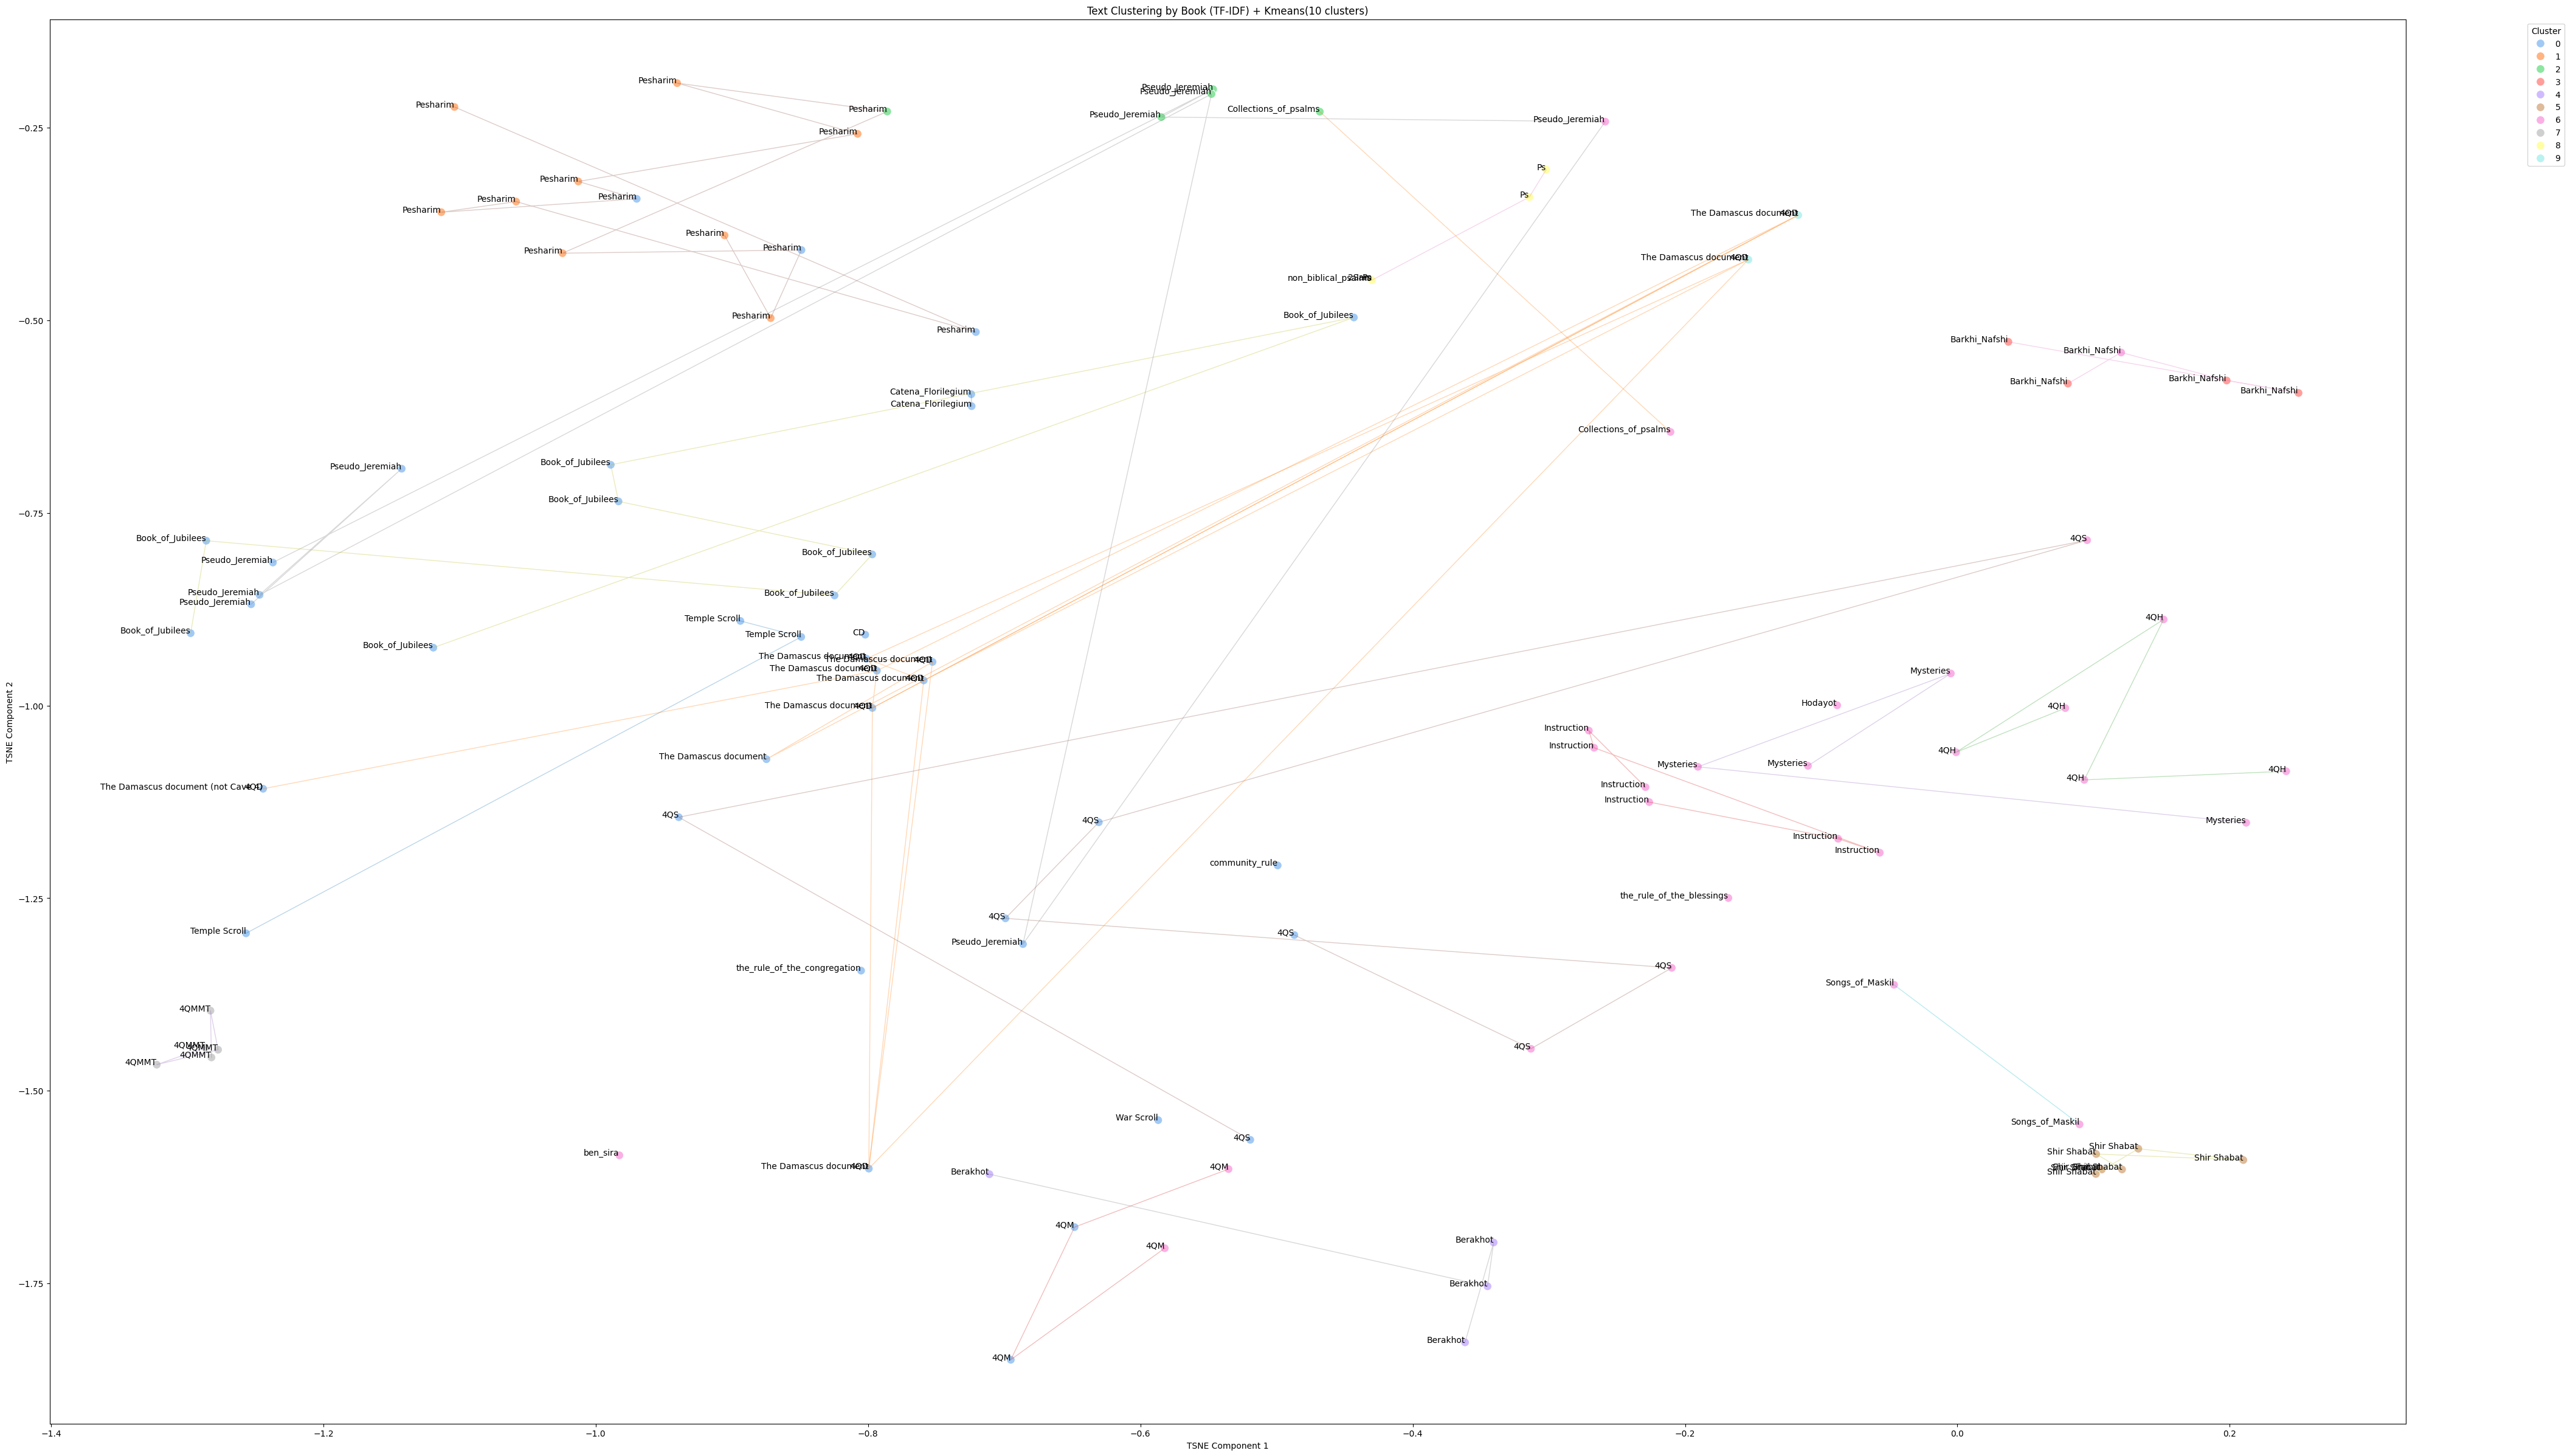

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


N_CLUSTERS = 10
# Step 1: Prepare Data
df_sampled = df_by_book_by_comp.sample(frac=1, random_state=42)
df_sampled = df_sampled[df_sampled["label"]!="bib"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sampled['text'])

# Step 2: Clustering
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0)
clusters = kmeans.fit_predict(X)
df_sampled['cluster'] = clusters

# Visualization
tsne = TSNE(n_components=2, random_state=0, perplexity=100)
components = tsne.fit_transform(X.toarray())
df_sampled['tsne-2d-one'] = components[:, 0]
df_sampled['tsne-2d-two'] = components[:, 1]

# Plot using seaborn for the scatter plot
plt.figure(figsize=(50, 30))
scatter = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue='cluster', data=df_sampled, palette='pastel', s=100)

# Adding text labels and connecting lines for each label
for label, group in df_sampled.groupby('composition'):
    # Draw lines connecting points
    plt.plot(group['tsne-2d-one'], group['tsne-2d-two'], linewidth=1, alpha=0.3)
    # Add text labels
    for i, row in group.iterrows():
        plt.text(row['tsne-2d-one'], row['tsne-2d-two'], row['composition'], fontdict=dict(color='black', size=10), ha='right')

plt.title(f'Text Clustering by Book (TF-IDF) + Kmeans({N_CLUSTERS} clusters)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig("tsne_by_book_composition_label_bib.png")
plt.show()


In [26]:
df_by_book_by_comp.groupby("label")["book"].count()

label
bib       242
nonbib    108
Name: book, dtype: int64

In [2]:
# df_filtered[["book_pasuk", "train_test", "label", "section"]].to_csv(
#         f"DSS_all_labels.txt",
#         sep="\t",
#         index=False,
#         header=False,
#     )

# df_filtered["text"].to_csv(
#         f"DSS_all_text.txt", index=False, header=False
#     )

## Comparison of classification of bib nonbib documents by tf-idf vs trigrams (naive bayes)

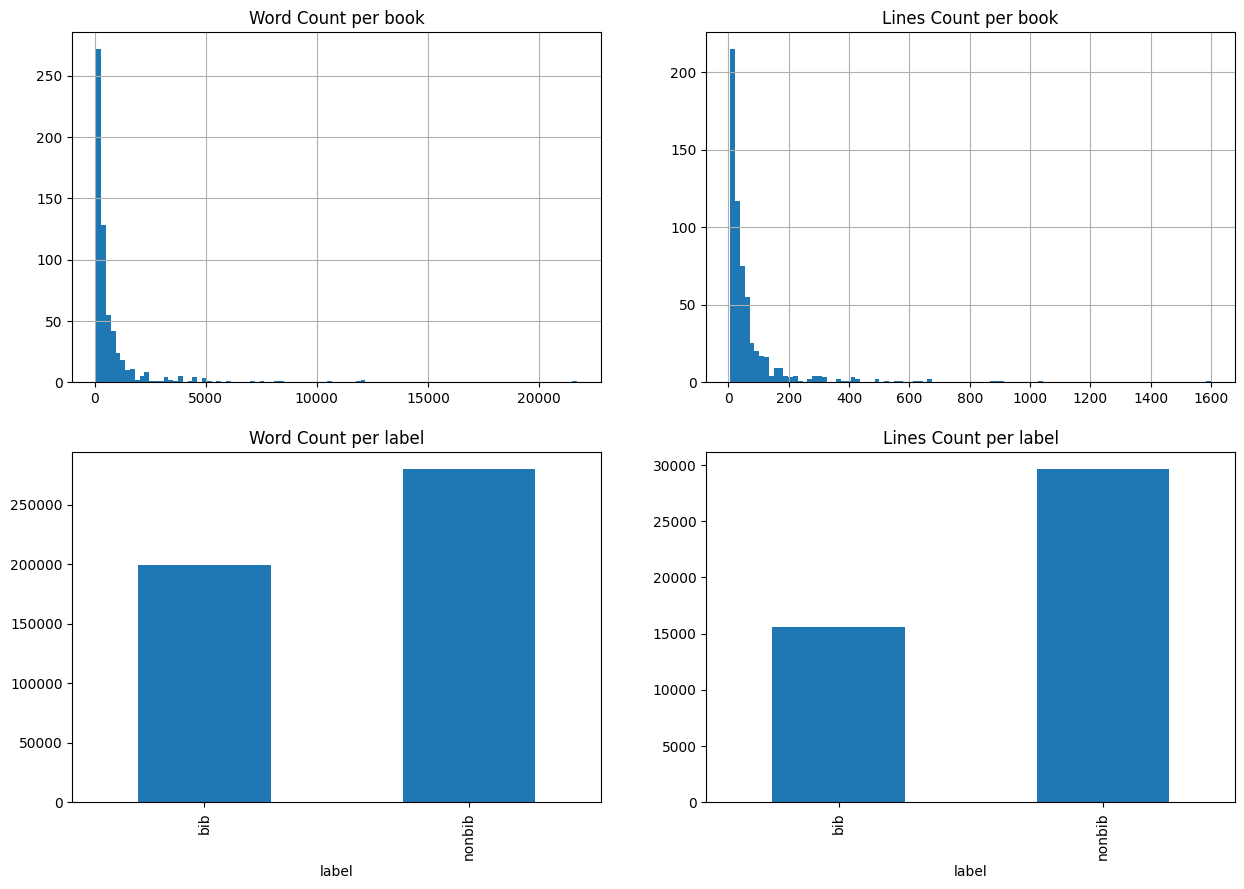

In [19]:
book_stats, label_stats = generate_stats(df_filtered)
plot_word_line_stats(book_stats, label_stats)

In [20]:
import re

def preprocess(text):
    # Normalize and replace newlines and carriage returns with space
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Filter out everything except basic Hebrew letters (א-ת)
    text = re.sub('[^\u05D0-\u05EA ]+', '', text)
    # Optional: Remove multiple spaces
    text = ' '.join(text.split())
    return text

# Apply the preprocessing to your dataframe
df_filtered['text'] = df_filtered['text'].apply(preprocess)

In [21]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_filtered, test_size=0.3, random_state=42, stratify=df_filtered["label"])
df_train["train_test"]="train"
df_test["train_test"]="test"
df_filtered = pd.concat([df_train, df_test])

In [22]:
df_filtered.groupby(["train_test","label"]).count()

book  pasuk   text  word_count  book_pasuk
train_test label                                              
test       bib      4673   4673   4673        4673        4673
           nonbib   8897   8897   8897        8897        8897
train      bib     10903  10903  10903       10903       10903
           nonbib  20760  20760  20760       20760       20760

In [23]:
# df_filtered[["book_pasuk", "train_test", "label"]].to_csv(
#         f"DSS_bibnobib_tf_labels.txt",
#         sep="\t",
#         index=False,
#         header=False,
#     )
# 
# df_filtered["text"].to_csv(
#         f"DSS_bibnobib_tf_text.txt", index=False, header=False
#     )

In [24]:
def get_tf_idf_features(df):
    from sklearn.feature_extraction.text import TfidfVectorizer
    td = TfidfVectorizer(max_features = 4500)
    X = df["text"]
    y = df["label"]
    X = td.fit_transform(X).toarray()
    return X, y
        
def get_trigram_features(df):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_trigram = CountVectorizer(analyzer='char', ngram_range=(3,3))
    X = vectorizer_trigram.fit_transform(df["text"])
    y = df["label"]
    return X, y

def training(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)
    classifier = model()
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    # Classification metrics
    
    classification_report_print = classification_report(y_test, y_pred)
    classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

    
    # print('\n Accuracy: ', accuracy_score(y_test, y_pred))
    # print('\nClassification Report')
    # print('======================================================')
    # print('\n', classification_report_print)
    return classification_report_dict
def gather_stats(output_iter, method):
    res = []
    for label in ['bib', 'nonbib']:

        precision = output_iter[label]["precision"]
        recall = output_iter[label]["recall"]
        f1 = output_iter[label]["f1-score"]
        res.append({"method": method,"label": label, "precision": precision, "recall": recall, "f1": f1})
    accuracy = {"method": method, 'accuracy': output_iter["accuracy"]}
    return res, accuracy


In [27]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
precision_recall = []
accuracy = []
for iter in tqdm(range(25)):
    X1,y1 = get_tf_idf_features(df_filtered)
    output_iter = training(X1,y1,MultinomialNB)
    res1, accuracy1 = gather_stats(output_iter, "tf-idf")
    
    X2,y2 = get_trigram_features(df_filtered)
    output_iter = training(X2,y2,MultinomialNB)
    res2, accuracy2 = gather_stats(output_iter, "trigram")
    
    precision_recall.extend(res1)
    precision_recall.extend(res2)
    accuracy.extend(res1)
    accuracy.extend(res2)


100%|██████████| 25/25 [02:46<00:00,  6.66s/it]


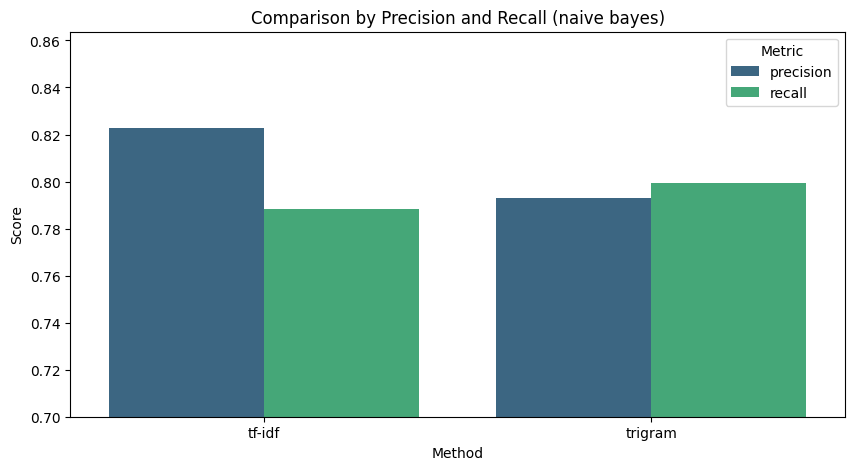

In [28]:
import seaborn as sns
comparison_results = pd.DataFrame(precision_recall)

avg_metrics = comparison_results.groupby('method')[['precision', 'recall']].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))

# Plot for Precision and Recall by Method
sns.barplot(x='method', y='value', hue='variable', data=pd.melt(avg_metrics, id_vars=['method']), palette='viridis')
plt.title('Comparison by Precision and Recall (naive bayes)')
plt.ylabel('Score')
plt.xlabel('Method')
plt.legend(title='Metric')
plt.ylim(0.7,)
plt.show()